In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.shape

(550068, 12)

In [5]:
test=pd.read_csv('test.csv')

In [6]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
test.shape

(233599, 11)

In [8]:
train['type']='train'
test['type']='test'

In [9]:
data=pd.concat([train,test],ignore_index=True)

C:\Users\adity\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
User_ID                       783667 non-null int64
type                          783667 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 77.7+ MB


In [11]:
data.isnull().sum()

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
User_ID                            0
type                               0
dtype: int64

In [12]:
data.shape

(783667, 13)

In [13]:
data['Product_Category_2']=data['Product_Category_2'].fillna(0)
data['Product_Category_3']=data['Product_Category_3'].fillna(0)

In [14]:
data.isnull().sum()

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
User_ID                            0
type                               0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Age']=le.fit_transform(data['Age'])
data['City_Category']=le.fit_transform(data['City_Category'])
data['Gender']=le.fit_transform(data['Gender'])

In [16]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [17]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].replace('4+','4')

In [18]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [19]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].astype(float)

In [20]:
data['User_ID']=data['User_ID']-1000000
data['User_ID']=le.fit_transform(data['User_ID'])

In [21]:
data['Product_ID']=data['Product_ID'].str.replace('P00','')

In [22]:
data['Product_ID']=data['Product_ID'].astype(int)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
Age                           783667 non-null int32
City_Category                 783667 non-null int32
Gender                        783667 non-null int32
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null int32
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null float64
User_ID                       783667 non-null int64
type                          783667 non-null object
dtypes: float64(4), int32(4), int64(4), object(1)
memory usage: 65.8+ MB


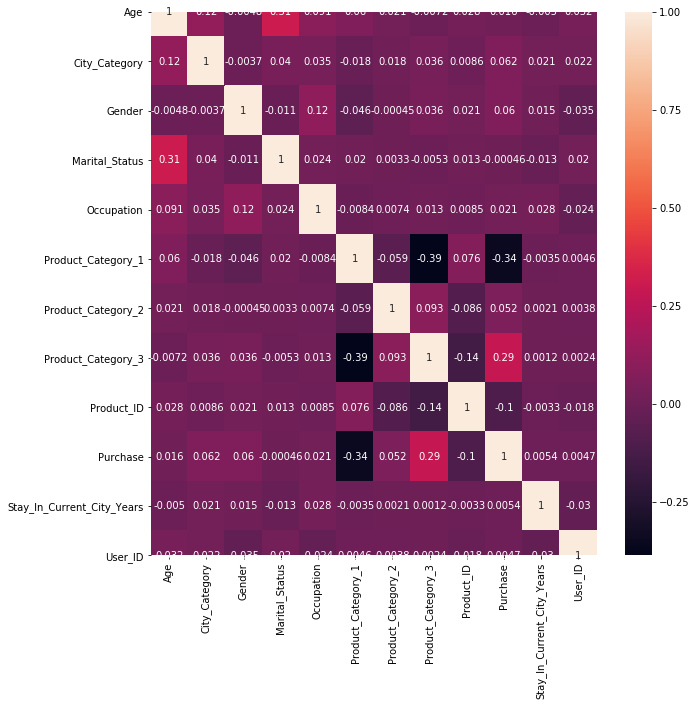

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

### Feature Engineering

In [25]:
train = data.loc[data['type']=='train']
test = data.loc[data['type']=='test']

In [26]:
X_train=train.drop(['type','Purchase'],axis=1)
Y_train=train['Purchase']
X_test=test.drop(['type','Purchase'],axis=1)

In [27]:
from xgboost.sklearn import XGBRegressor

In [28]:
xgb_reg=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=40, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1) 

In [29]:
xgb_reg.fit(X_train,Y_train)
Y_pred = xgb_reg.predict(X_test)

C:\Users\adity\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\adity\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [1]:
xgb_reg.score()

NameError: name 'xgb_reg' is not defined

In [45]:
Y_pred_final=(Y_pred_tree+Y_pred)/2

In [30]:
sm=pd.read_csv('sample.csv')

In [31]:
#sub={'Comb':sm['Comb'],'Purchase':Y_pred}

In [32]:
#sub1=pd.DataFrame(sub)

In [33]:
#sub1['Purchase']=sub1['Purchase'].astype(int)

In [34]:
#sub1.head()

In [35]:
test_df=pd.read_csv('test.csv')

In [36]:
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [37]:
#sub1.to_csv('submission1.csv',index=False)

In [46]:
sub2={'User_ID':test_df['User_ID'],'Product_ID':test_df['Product_ID'],'Purchase':Y_pred_final}

In [47]:
sub3=pd.DataFrame(sub2)

In [48]:
sub3['Purchase']=sub3['Purchase'].astype(int)

In [49]:
sub3.to_csv('submission31.csv',index=False)